In [10]:
import pandas as pd
import os

In [11]:
#### Merging 12 months of sales data into a single file

In [19]:
allMonthsData = pd.DataFrame() # Create empty pandas data frame

files = [file for file in os.listdir("./Sales_Data")] # Obtain all files from the Sales_Data folder

# Iterate through each file by (1) Reading the files and (2) adding the file to the allMonthsData dataframe
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    allMonthsData = pd.concat([allMonthsData, df])

allMonthsData.to_csv("all_data.csv", index = False) # Convert the allMonthsData data frame to a csv file and save it


In [20]:
### Read in the updated dataframe

allData = pd.read_csv("all_data.csv")
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [37]:
# Task 1: Data Pre-Processing/Cleaning

# Identify rows that include NaN values
nanDf = allData[allData.isna().any(axis=1)]
nanDf.head()

allData = allData.dropna(how = "any") # Remove all the rows with at least one NaN values 

In [40]:
# Identify rows where the "Month" values is "Or"
tempDf = allData[allData["Order Date"].str[0:2] == "Or"] # Subset the dataframe according to this condition
tempDf.head()

# Drop the rows with "Month" values equal to "Or"
allData = allData[allData["Order Date"].str[0:2] != "Or"]

In [41]:
### Task 2: Augment the data with additional columns for useful analysis

### Add a "Month" Column
allData["Month"] = allData["Order Date"].str[0:2] # Due to the date format, we simply take the first 2 characters
allData["Month"] = allData["Month"].astype("int32") # Converts the month from string to integer type

In [46]:
# Convert Columns to their correct data type
allData["Quantity Ordered"] = pd.to_numeric(allData["Quantity Ordered"]) # "Quantity Ordered" converted to "int"
allData["Price Each"] = pd.to_numeric(allData["Price Each"]) # "Price Each" converted to "float"
allData.info() # to verify the operations are successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


In [51]:
### Add a "Revenue" Column
allData["Sales"] = allData["Quantity Ordered"] * allData["Price Each"]
allData["Sales"] = pd.to_numeric(allData["Sales"]) # "Sales" converted to "float"
allData.info() # verify the operation is successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


In [65]:
### Question 1: What was the best month in terms of Sales? How much was earned that month?
results = allData.groupby("Month").sum() # Group the data by month & sum numerical categories
results.head()
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quantity Ordered  12 non-null     int64  
 1   Price Each        12 non-null     float64
 2   Sales             12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 384.0 bytes


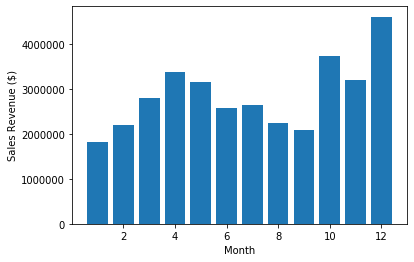

In [89]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(x=months, height=results["Sales"])
plt.xlabel("Month")
plt.ylabel("Sales Revenue ($)")
plt.show()

highestRevenue = results[11:12:]["Sales"]
# Total revenue of $4.613443e+06 was generated in December

In [95]:
# Task 4: Add a "City" column

# Algorithm: Split "Purchase Address" by comma, then obtain the item at index 1
# Caveat: "Apply" function may not be the most computationally efficient function to use on a large scale
#         but it suffices for this task
# ISSUE: Some cities have the same name! So we should also extract the "State" to prevent false duplicates

# allData["City"] = allData["Purchase Address"].apply(lambda x: x.split(",")[1]) 
# allData["State"] = allData["Purchase Address"].apply(lambda x: x.split(",")[2])
# allData["State"] = allData["State"].apply(lambda x: x.split(" ")[1])



# Alternative Solution
def getCity(address):
    return address.split(",")[1]

def getState(address):
    return address.split(",")[2].split(" ")[1]

allData["City"] = allData["Purchase Address"].apply(lambda x: getCity(x) + " (" + getState(x)  + ")")
del allData["State"]
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


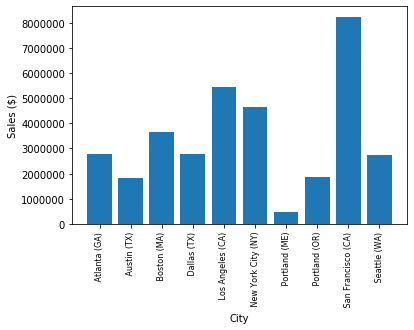

In [113]:
# Question 2: What city has the highest numbe of sales?

results = allData.groupby("City").sum()
results[:10:]

# Create an array containing each unique city
# ATTENTION: this function CHANGES the order of the entries relative to what they were in original dataframe
cities = allData["City"].unique() 

# To preserve the pair-wise order of City-Sales data, we do the following:
cities = [city for city, df in allData.groupby("City")]

plt.bar(x=cities, height=results["Sales"])
plt.xticks(cities, rotation="vertical", size=8) # To accomodate for long city names
plt.xlabel("City")
plt.ylabel("Sales ($)")
plt.show()

In [116]:
# Question 3: At what time should advertisements be displayed, to maximize likelihood of 
#             customers buying products?


# Strategy: Create a distribution of amount of sales over a 24-hour period
# We will convert "Order Date" to Python date-time format

allData["Order Date"] = pd.to_datetime(allData["Order Date"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [120]:
allData["Hour"] = allData["Order Date"].dt.hour # Augment dataframe to give us exact hour order was placed
allData["Minute"] = allData["Order Date"].dt.minute # Augment dataframe to give us exact hour order was placed
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


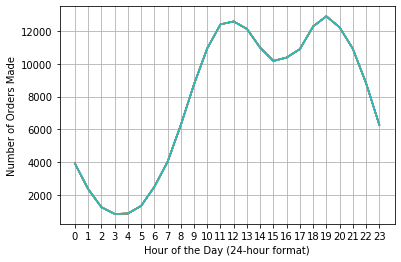

In [126]:
hours = [hour for hour, df in allData.groupby("Hour")]
plt.plot(hours, allData.groupby(["Hour"]).count())
plt.ylabel("Number of Orders Made")
plt.xlabel("Hour of the Day (24-hour format)")
plt.xticks(hours)
plt.grid() # To aid visualization
plt.show()

# We have a peak at around noon & another peak at around 7 PM
# Ideally, advertising should be made between 10 AM & 1 AM, as well as between 5 PM & 8 PM

In [140]:
# Question 4: What products are most often sold together?

# Strategy 1: For products to be "sold together", they would have to be purchased at the same time
#           and from the same location.
# Strategy 2: The order ID uniquely identifies each order. Therefore if items are purchased together,
#             they have exactly the same order ID.

duplicates = allData[allData["Order ID"].duplicated(keep=False)] # Only keep duplicated order IDs
duplicates.head(n=30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


In [142]:
duplicates["Items Ordered"] = duplicates.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
duplicates.head()

duplicates = duplicates[["Order ID", "Items Ordered"]].drop_duplicates()
duplicates.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Items Ordered
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [148]:
# Strategy: Count the pairs of items & determine which combination is ordered most frequently

from itertools import combinations
from collections import Counter

count = Counter()
for row in duplicates["Items Ordered"]:
    row_list = row.split(", ") # Split up the row by comma 
    count.update(Counter(combinations(row_list, 2))) # Count pairs of 2
    
# Output a cleaner representation of this dictionary
for key, value in count.most_common(10):
    print(key, value)
# By inspection, we see that iPhone & Lightning Charging Cable is the most commonly purchased
# pair of items


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


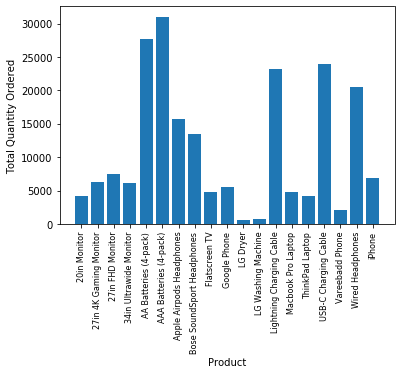

In [161]:
# Question 5: Which product sold the most? Why?

productGroup = allData.groupby("Product")
quantityOrdered = productGroup.sum()["Quantity Ordered"]

product = [product for product, df in productGroup]

plt.bar(product, quantityOrdered)
plt.xlabel("Product")
plt.ylabel("Total Quantity Ordered")
plt.xticks(product, rotation="vertical", size=8)
plt.show()

# From the graph, we see the AAA 4-pack of batteries was the most ordered item 
# Reasons: relatively affordable, batteries require frequent replacement, AAA is the highest quality
#          common household items requrie such batteries

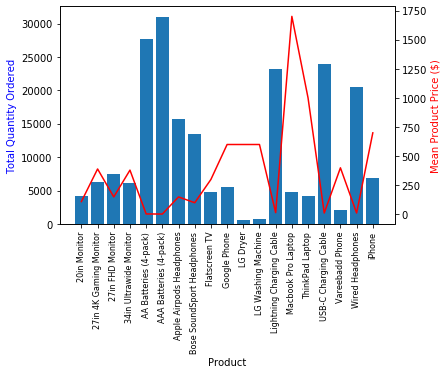

In [177]:
prices = allData.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantityOrdered)
ax2.plot(product, prices, "r-")

ax1.set_xlabel("Product")
ax1.set_ylabel("Total Quantity Ordered", color="b")
ax2.set_ylabel("Mean Product Price ($)", color="r")
ax1.set_xticklabels(product, rotation="vertical", size=8)
plt.show()

# There appears to be a relationship between mean product price and quantity ordered 